In [7]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Master Pipeline for Retail Data Processing

## Overview
This notebook implements a **master pipeline** that processes raw retail transaction data (`df_a_raw`) into a log-transformed RFM (Recency, Frequency, Monetary) dataframe, ready for scaling and K-Means clustering. The pipeline automates data cleaning, based on the guidelines seen in [data information](https://archive.ics.uci.edu/dataset/502/online+retail+ii), feature engineering based on RFM framework, RFM computation, and logarithmic transformation, reducing manual steps and ensuring reproducibility, for similar datasets. 

## Pipeline Steps (in Order)
The pipeline (`master_pipeline_to_log_rfm`) executes the following steps sequentially:
1. **Data Cleaning**: Applies `cleaning_pipeline` to normalize columns, filter invalid invoices/stockcodes, remove duplicates/NaNs, and drop zero prices.
2. **Feature Engineering**: Encodes country (mean encoding), converts `customer_id` to int, and adds `sale_total` (quantity * price).
3. **RFM Computation**: Aggregates data by `customer_id` to create RFM features: `recency_days`, `frequency`, `sale_value`.
4. **Logarithmic Transformation**: Applies log to `frequency` and `sale_value` to handle skewness/outliers, adding `frequency_log` and `sale_value_log`.
5. **Indexing**: Sets `customer_id` as the index for easier scaling.

**Output**: A dataframe with columns `customer_id` (index), `recency_days`, `frequency_log`, `sale_value_log`—ready for `apply_standard_scaling` and K-Means.

## How to Start the Pipeline
1. **Load Data**: Ensure `df_a_raw` is loaded (e.g., `df_a_raw = pd.read_pickle('df_2010-2011.pkl')`).
2. **Run the Pipeline**: Call the function in a code cell:
   ```python
   df_log = master_pipeline_to_log_rfm(df_a_raw)
   ```

# Imports

In [8]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.utils import *
from src.pipeline import *


In [4]:
load_pkl_to_dataframe(var_name='df');


FileUpload(value=(), accept='.pkl', description='Upload PKL')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_loaded = load_pkl_to_dataframe.df


# Pipeline start

'Starting Master Pipeline: Raw Data -> RFM Features -> Log Transformed -> Scaled'

'Starting data cleaning pipeline'

'Input shape: (541910, 8)'

'Column names normalized'

'Shape: (541910, 8)'

'invoice' converted to string type


"Filtered 9288 rows where 'invoice' starts with 'C'"

'stockcode' converted to string type
31 abnormal values:


c:\Users\arq_c\Desktop\repo_collabs\ds_projects_collabs\1-cluster_retail_uci\src\etl.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['POST',
 'C2',
 'DOT',
 'M',
 'BANK CHARGES',
 'AMAZONFEE',
 'DCGS0076',
 'DCGS0003',
 'gift_0001_40',
 'DCGS0070',
 'm',
 'gift_0001_50',
 'gift_0001_30',
 'gift_0001_20',
 'DCGS0055',
 'DCGS0072',
 'DCGS0074',
 'DCGS0069',
 'DCGS0057',
 'DCGSSBOY',
 'DCGSSGIRL',
 'gift_0001_10',
 'S',
 'PADS',
 'DCGS0004',
 'DCGS0073',
 'DCGS0071',
 'DCGS0066P',
 'DCGS0068',
 'DCGS0067',
 'B']

Removed 2412 rows where 'stockcode' was in the exclusion list.
Shape after exclusion: (530210, 8)
Filtered 530210 rows, dropped 0 entries not matching 6 consecutive digits
Removed 133840 rows with missing customer IDs
Found 5187 duplicated rows
Sample duplicated rows (sorted):


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


Dropped duplicates. New shape: (391183, 8)
Found 33 rows with price == 0. Removing them...
Removed zero-price rows. Final shape: (391150, 8)
Mean encoding applied to 'country'. New column: 'country_mean_encoded'


"Created 'sale_total' as product of 'quantity' and 'price'"

'Computed RFM features for 4334 customers'

Applied log transformation to 'frequency' -> 'frequency_log'
Applied log transformation to 'sale_value' -> 'sale_value_log'


"Set 'customer_id' as index. Final shape: (4334, 5)"

"Set 'customer_id' as index. Final shape: (4334, 3)"

Calculating Inertia for K values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


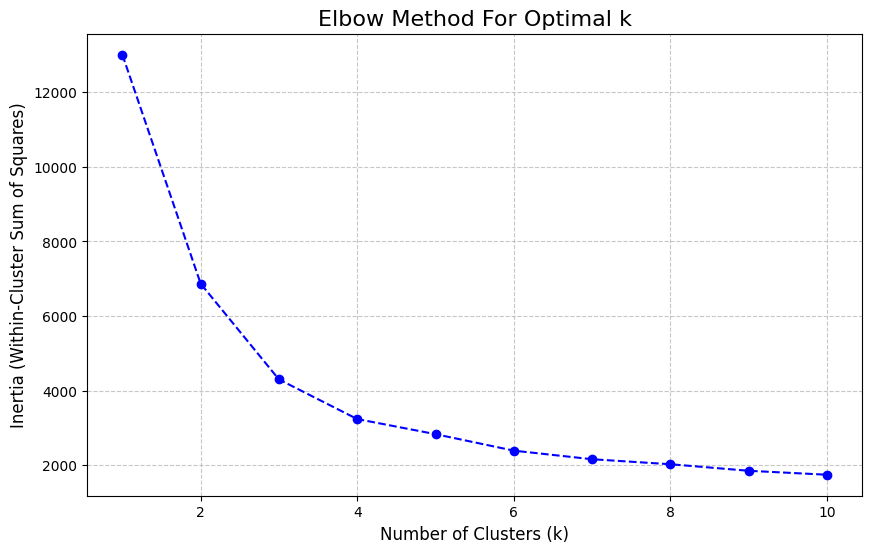

Model fitted.
Applying PCA on 3 features: ['sale_value_log', 'frequency_log', 'recency_days']
Explained Variance Ratio: [0.72045357 0.21603533]
Total Variance Explained by 2 components: 93.65%


c:\Users\arq_c\Desktop\repo_collabs\.data_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



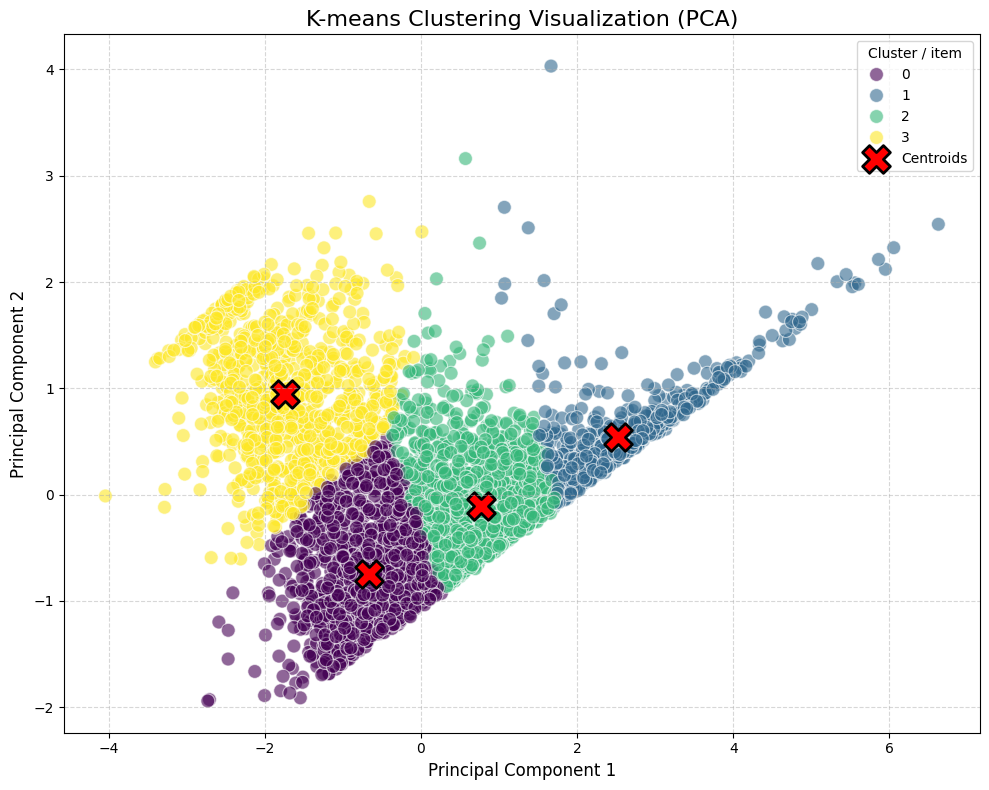

c:\Users\arq_c\Desktop\repo_collabs\ds_projects_collabs\1-cluster_retail_uci\src\visualization.py:284: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\arq_c\Desktop\repo_collabs\ds_projects_collabs\1-cluster_retail_uci\src\visualization.py:290: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\arq_c\Desktop\repo_collabs\ds_projects_collabs\1-cluster_retail_uci\src\visualization.py:296: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




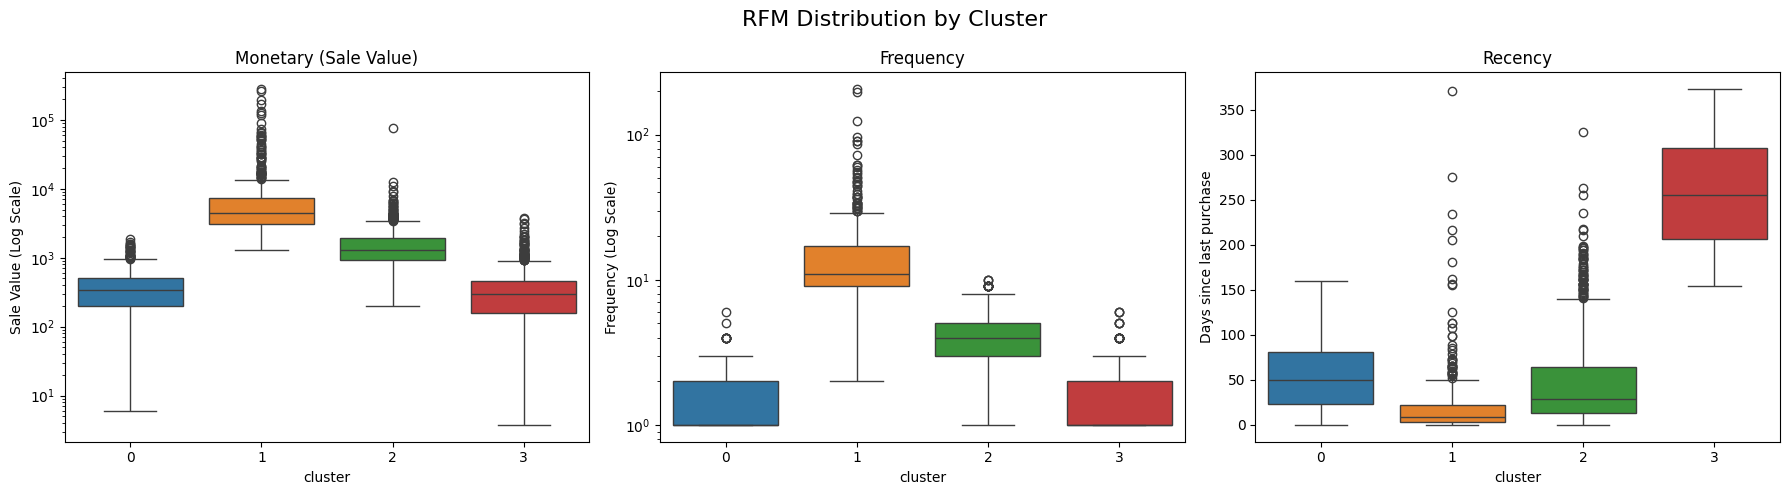

In [9]:
# End-to-end
results = full_clustering_pipeline(
    df_loaded,                                                         # Dataframe loaded from .pkl file
    k_range=range(1, 11),                                              # Range to calculate innerthian cluster sum of squares
    default_k=4,                                                       # Suggested cluster numbers after elbow method (consultate elbow graph)
    cols_to_scale=["sale_value_log", "frequency_log", "recency_days"], # List of columns to scale (for KMeans algorithm)
    cluster_map_names={                                                # Custom naming of clusters
        0: "At-Risk Customers",
        1: "Top-Value Customers",
        2: "High-Value Customers",
        3: "Average Customers",
    },
)

df_cluster = results["df_cluster"]
df_real_values = results["df_real_values"]
cluster_desc = results["cluster_desc"]
